In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from fractions import Fraction


In [2]:
# Defining the Observables
q = Symbol('q')
omega = Symbol('\Omega')
sigma = Symbol('\Sigma')
sigmatot = Symbol('Sigma_tot')
sigmasfr = Symbol('Sigma_SFR')
T = Symbol('T')


# Defining the Constants
calpha = Symbol('C_alpha')
gamma = Symbol('gamma')
boltz = Symbol('k_B')
mu = Symbol('mu')
mh = Symbol('m_H')
G = Symbol('G')
xio = Symbol('xi_0')
delta = Symbol('\delta')
mstar = Symbol('m_*')
cl = Symbol('C_l')
kappa = Symbol('kappa')

# Defining the general parameters
u = Symbol('u')
tau = Symbol('tau')
l = Symbol('l')
mach = Symbol('M')


# Defining the expressions
cs = (gamma*boltz*T/(mu*mh))**Rational(1/2)
# Ralpha = alphak*h/eta
# Romega = -q*omega*h**2/eta


sigmatot


Sigma_tot

## Model 2

#### $M$ << $\sqrt2$

In [3]:
h = (2*cs**2)/(3*pi*G*sigmatot)
nu = (delta*sigmasfr)/(2*h*mstar)


### Evaluating expressions

In [4]:
from fractions import Fraction
l = cl*h
usn = ((4*pi/3)*l**4*cs**2*nu)**Fraction(1, 3)
a = [(u, usn)]
h = simplify(h.subs(a))
h


2*T*gamma*k_B/(3*pi*G*Sigma_tot*m_H*mu)

In [5]:
l = simplify(l.subs(a))
l


2*C_l*T*gamma*k_B/(3*pi*G*Sigma_tot*m_H*mu)

In [6]:
u = simplify(u.subs(a))
u


2*2**(1/3)*3**(2/3)*(C_l**4*Sigma_SFR*T**4*\delta*gamma**4*k_B**4/(G**3*Sigma_tot**3*m_**m_H**4*mu**4))**(1/3)/(9*pi**(2/3))

In [7]:
tau = l/u
tau = simplify(tau.subs(a))
tau


2**(2/3)*3**(1/3)*C_l*T*gamma*k_B/(2*pi**(1/3)*G*Sigma_tot*m_H*mu*(C_l**4*Sigma_SFR*T**4*\delta*gamma**4*k_B**4/(G**3*Sigma_tot**3*m_**m_H**4*mu**4))**(1/3))

In [8]:
rho = sigma/(2*h)
Beq = u*(4*pi*rho)**Rational(1/2)
biso = (Beq*(xio**(1/2)))
biso = simplify(biso.subs(a))
biso = biso.powsimp(force=True)
biso


2*2**(1/3)*3**(1/6)*pi**(1/3)*xi_0**0.5*sqrt(G*Sigma_tot*\Sigma*m_H*mu/(T*gamma*k_B))*(C_l**4*Sigma_SFR*T**4*\delta*gamma**4*k_B**4/(G**3*Sigma_tot**3*m_**m_H**4*mu**4))**(1/3)/3

In [9]:
bani = biso*(Rational(2/3)*q*omega)**Rational(1/2)*(tau**Rational(1/2))

bani = simplify(bani.subs(a))
bani = bani.powsimp(force=True)
bani


2**(2/3)*sqrt(222399981598543)*3**(5/6)*pi**(1/6)*xi_0**0.5*sqrt(C_l*\Omega*\Sigma*q/(C_l**4*Sigma_SFR*T**4*\delta*gamma**4*k_B**4/(G**3*Sigma_tot**3*m_**m_H**4*mu**4))**(1/3))*(C_l**4*Sigma_SFR*T**4*\delta*gamma**4*k_B**4/(G**3*Sigma_tot**3*m_**m_H**4*mu**4))**(1/3)/67108864

In [10]:
eta = tau*(u**2)/3
Rk = Symbol('R_k')
Dk = -(9*calpha*q*(h**2)*(omega**2))/u**2
Dc = -(pi**5)/32
rho = sigma/(2*h)
Beq = (4*pi*rho)**Rational(1/2)*u
Bbar = (pi*Beq*l*(Rk*(Dk/Dc))**Rational(1/2))/h

Bbar = simplify(Bbar.subs(a))
Bbar = Bbar.powsimp(force=True)
Bbar


8*sqrt(6)*C_l*(C_l**4*Sigma_SFR*T**4*\delta*gamma**4*k_B**4/(G**3*Sigma_tot**3*m_**m_H**4*mu**4))**(1/3)*sqrt(C_alpha*R_k*T*\Omega**2*\Sigma*gamma*k_B*q/(G*Sigma_tot*m_H*mu*(C_l**4*Sigma_SFR*T**4*\delta*gamma**4*k_B**4/(G**3*Sigma_tot**3*m_**m_H**4*mu**4))**(2/3)))/pi**(3/2)

In [11]:
tanpb = -((pi**2)*tau*(u**2))/(12*q*omega*(h**2))
tanpb = simplify(tanpb.subs(a))
tanpb = tanpb.subs([(tau, tau), (l, l)])
tanpb = simplify(tanpb)
tanpb


-2**(1/3)*3**(2/3)*pi**(7/3)*C_l*G*Sigma_tot*m_H*mu*(C_l**4*Sigma_SFR*T**4*\delta*gamma**4*k_B**4/(G**3*Sigma_tot**3*m_**m_H**4*mu**4))**(1/3)/(36*T*\Omega*gamma*k_B*q)

In [12]:
quantities = [ h, l, u, tau, biso, bani, Bbar, tanpb ]
import pickle
with open("model2a.txt", "wb") as outf:
    pickle.dump(quantities, outf)

The power to which the observable Sigma_tot is raised is: 0


c:\Users\WS7\anaconda3\envs\tensorflow\lib\site-packages\sympy\plotting\plot.py:1455: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale(parent.yscale)


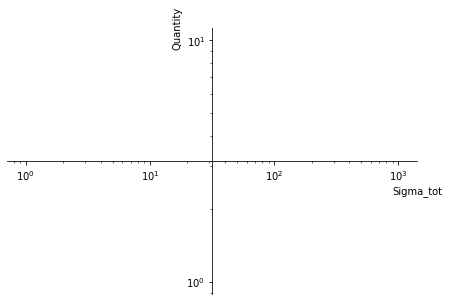

The power to which the observable \Sigma is raised is: 0


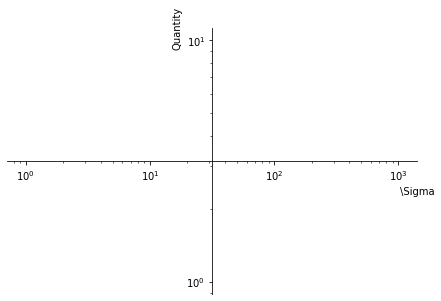

The power to which the observable Sigma_SFR is raised is: 1/3


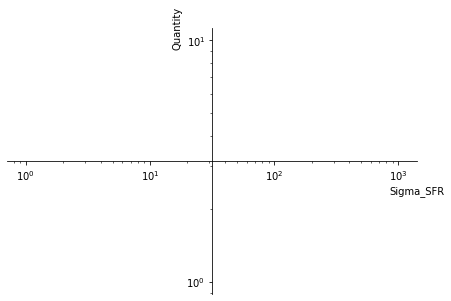

The power to which the observable \Omega is raised is: -1


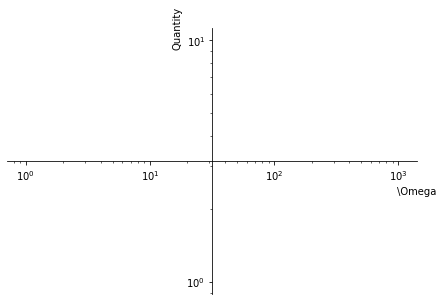

The power to which the observable q is raised is: -1


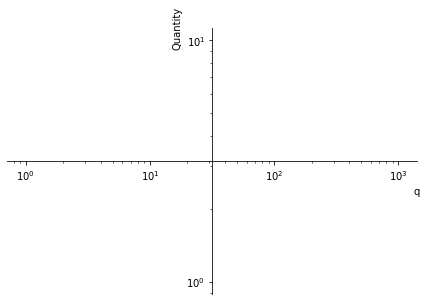

The power to which the observable T is raised is: 1/3


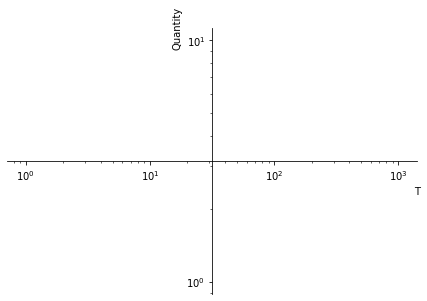

The scaling relation is 


Sigma_SFR**(1/3)*T**(1/3)/(\Omega*q)

In [13]:
from sympy.plotting import plot3d, plot
const = [(gamma, 1), (boltz, 1), (mh, 2), (mu, 1), (mach, sqrt(2)), (G, 1),
         (cl, 5), (xio, 0.4), (kappa, 1), (calpha, 1), (Rk, 1), (mstar, 1), (delta, 1)]
variables = [(sigmatot, 1), (sigma, 1), (sigmasfr, 1),
             (omega, 1), (q, 1), (T, 1)]

# quantity to be plotted
quan = tanpb
# observable to be varied
observ = [variables[i][0] for i in range(len(variables))]
# powers for scaling relations
powe = []
# plotting the scaling relations
for obs in observ:
    variables = [(sigmatot, 1), (sigma, 1), (sigmasfr, 1),
                 (omega, 1), (q, 1), (T, 1)]
    variables.remove((obs, 1))
    final = const + variables
    z = quan.subs(final)
    powe.append(diff(log(z), obs)*obs)
    print('The power to which the observable {} is raised is: {}'.format(
        str(obs), diff(log(z), obs)*obs))
    p = plot(z, (obs, 1, 1000), xscale='log',
             yscale='log', xlabel=obs, ylabel='Quantity')
    p.show

# verifying scaling relation
scaling = np.power(observ, powe)
relation = 1
for i in scaling:
    relation *= i

print('The scaling relation is ')
relation


In [14]:
# Defining the Observables
q = Symbol('q')
omega = Symbol('\Omega')
sigma = Symbol('\Sigma')
sigmatot = Symbol('Sigma_tot')
sigmasfr = Symbol('Sigma_SFR')
T = Symbol('T')


# Defining the Constants
calpha = Symbol('C_alpha')
gamma = Symbol('gamma')
boltz = Symbol('k_B')
mu = Symbol('mu')
mh = Symbol('m_H')
G = Symbol('G')
xio = Symbol('xi_0')
delta = Symbol('\delta')
mstar = Symbol('m_*')
cl = Symbol('C_l')
kappa = Symbol('kappa')

# Defining the general parameters
u = Symbol('u')
tau = Symbol('tau')
l = Symbol('l')
mach = Symbol('M')


# Defining the expressions
cs = (gamma*boltz*T/(mu*mh))**Rational(1/2)
# Ralpha = alphak*h/eta
# Romega = -q*omega*h**2/eta


sigmatot


Sigma_tot

#### $M$ >> $\sqrt2$

In [15]:
#h = (u**2)/(3*pi*G*sigmatot)
h = Symbol('h')
nu = (delta*sigmasfr)/(2*h*mstar)


### Evaluating expressions

In [16]:
l = cl*h
u = ((4*pi/3)*(l)**4*cs**2*(nu))**Fraction(1, 3)
usn = u.subs(h, 1)
h = ((usn**2)/(3*pi*G*sigmatot))**(Fraction(-1, 1))
# a = [(u,usn)]
# h = (simplify(h.subs(a)))**Fraction(-31,15)
# usn
h


3*2**(1/3)*3**(2/3)*pi**(1/3)*G*Sigma_tot/(2*(C_l**4*Sigma_SFR*T*\delta*gamma*k_B/(m_**m_H*mu))**(2/3))

In [17]:
l = cl*h
l = simplify(l)
l


3*2**(1/3)*3**(2/3)*pi**(1/3)*C_l*G*Sigma_tot/(2*(C_l**4*Sigma_SFR*T*\delta*gamma*k_B/(m_**m_H*mu))**(2/3))

In [18]:
nu = (delta*sigmasfr)/(2*h*mstar)
u = ((4*pi/3)*(l)**4*cs**2*(nu))**Fraction(1, 3)
#u = simplify(u).subs([(l,l),(h,h)])
u


3*2**(2/3)*3**(1/3)*pi**(2/3)*(G**3*Sigma_tot**3*m_**m_H*mu/(C_l**4*Sigma_SFR*T*\delta*gamma*k_B))**(1/3)/2

In [19]:
tau = l/u
tau = simplify(tau)
tau


2**(2/3)*3**(1/3)*C_l*G*Sigma_tot/(2*pi**(1/3)*(C_l**4*Sigma_SFR*T*\delta*gamma*k_B/(m_**m_H*mu))**(2/3)*(G**3*Sigma_tot**3*m_**m_H*mu/(C_l**4*Sigma_SFR*T*\delta*gamma*k_B))**(1/3))

In [20]:
rho = sigma/(2*h)
Beq = u*(4*pi*rho)**Rational(1/2)
biso = (Beq*(xio**(1/2)))/(u/cs)
biso = simplify(biso)
biso = biso.powsimp(force=True)
biso


2**(5/6)*3**(1/6)*pi**(1/3)*xi_0**0.5*sqrt(T*\Sigma*gamma*k_B*(C_l**4*Sigma_SFR*T*\delta*gamma*k_B/(m_**m_H*mu))**(2/3)/(G*Sigma_tot*m_H*mu))/3

In [21]:
bani = biso*(Rational(2/3)*q*omega)**Rational(1/2)*(tau**Rational(1/2))

bani = simplify(bani)
bani = bani.powsimp(force=True)
bani


2**(1/6)*sqrt(222399981598543)*3**(5/6)*pi**(1/6)*xi_0**0.5*sqrt(C_l*T*\Omega*\Sigma*gamma*k_B*q/(m_H*mu*(G**3*Sigma_tot**3*m_**m_H*mu/(C_l**4*Sigma_SFR*T*\delta*gamma*k_B))**(1/3)))/67108864

In [22]:
eta = tau*(u**2)/3
Rk = Symbol('R_k')
Dk = -(9*calpha*q*(h**2)*(omega**2))/u**2
Dc = -(pi**5)/32
rho = sigma/(2*h)
Beq = (4*pi*rho)**Rational(1/2)*u
Bbar = (pi*Beq*l*(Rk*(Dk/Dc))**Rational(1/2))/h

Bbar = simplify(Bbar)
Bbar = Bbar.powsimp(force=True)
Bbar


12*2**(2/3)*3**(5/6)*C_l*sqrt(C_alpha*G*R_k*Sigma_tot*\Omega**2*\Sigma*q/((C_l**4*Sigma_SFR*T*\delta*gamma*k_B/(m_**m_H*mu))**(2/3)*(G**3*Sigma_tot**3*m_**m_H*mu/(C_l**4*Sigma_SFR*T*\delta*gamma*k_B))**(2/3)))*(G**3*Sigma_tot**3*m_**m_H*mu/(C_l**4*Sigma_SFR*T*\delta*gamma*k_B))**(1/3)/pi**(5/6)

In [23]:
tanpb = -((pi**2)*tau*(u**2))/(12*q*omega*(h**2))
tanpb = simplify(tanpb)
tanpb = tanpb.subs([(tau, tau), (l, l)])
tanpb = simplify(tanpb)
tanpb


-2**(1/3)*3**(2/3)*pi**(7/3)*C_l*(C_l**4*Sigma_SFR*T*\delta*gamma*k_B/(m_**m_H*mu))**(2/3)*(G**3*Sigma_tot**3*m_**m_H*mu/(C_l**4*Sigma_SFR*T*\delta*gamma*k_B))**(1/3)/(36*G*Sigma_tot*\Omega*q)

In [24]:
quantities = [ h, l, u, tau, biso, bani, Bbar, tanpb ]
import pickle
with open("model2b.txt", "wb") as outf:
    pickle.dump(quantities, outf)

The power to which the observable Sigma_tot is raised is: -0.500000000000000


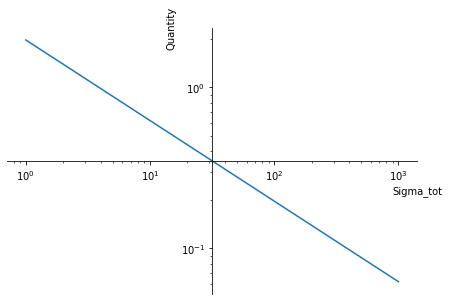

The power to which the observable \Sigma is raised is: 0.500000000000000


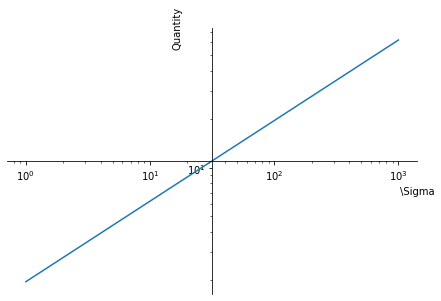

The power to which the observable Sigma_SFR is raised is: 0.166666666666667


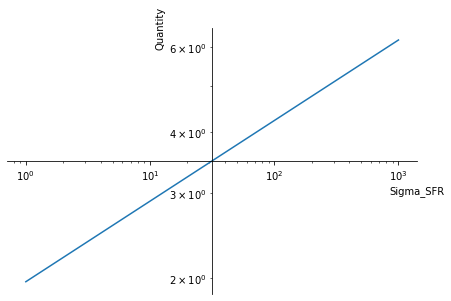

The power to which the observable \Omega is raised is: 0.500000000000000


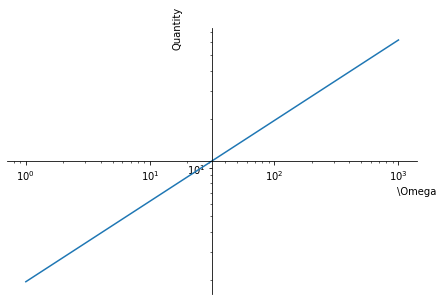

The power to which the observable q is raised is: 0.500000000000000


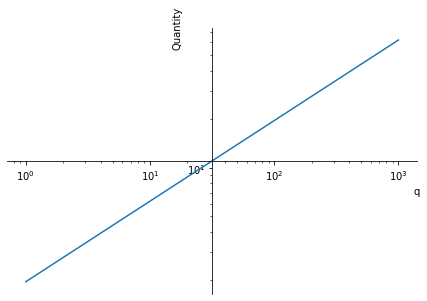

The power to which the observable T is raised is: 0.666666666666667


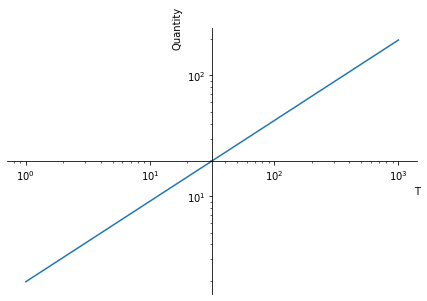

The scaling relation is 


Sigma_SFR**0.166666666666667*T**0.666666666666667*\Omega**0.5*\Sigma**0.5*q**0.5/Sigma_tot**0.5

In [25]:
from sympy.plotting import plot3d, plot
const = [(gamma, 1), (boltz, 1), (mh, 2), (mu, 1), (mach, sqrt(2)), (G, 1),
         (cl, 5), (xio, 0.4), (kappa, 1), (calpha, 1), (Rk, 1), (mstar, 1), (delta, 1)]
variables = [(sigmatot, 1), (sigma, 1), (sigmasfr, 1),
             (omega, 1), (q, 1), (T, 1)]

# quantity to be plotted
quan = bani
# observable to be varied
observ = [variables[i][0] for i in range(len(variables))]
# powers for scaling relations
powe = []
# plotting the scaling relations
for obs in observ:
    variables = [(sigmatot, 1), (sigma, 1), (sigmasfr, 1),
                 (omega, 1), (q, 1), (T, 1)]
    variables.remove((obs, 1))
    final = const + variables
    z = quan.subs(final)
    powe.append(diff(log(z), obs)*obs)
    print('The power to which the observable {} is raised is: {}'.format(
        str(obs), diff(log(z), obs)*obs))
    p = plot(z, (obs, 1, 1000), xscale='log',
             yscale='log', xlabel=obs, ylabel='Quantity')
    p.show

# verifying scaling relation
scaling = np.power(observ, powe)
relation = 1
for i in scaling:
    relation *= i

print('The scaling relation is ')
relation
